<a href="https://colab.research.google.com/github/rafaelmattos/Introducao-a-Ciencias-de-Dados/blob/main/Aula5_Tutoria_Victor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv("data/BreastCancer.csv")
data

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,0
695,841769,2,1,1,1,2,1.0,1,1,1,0
696,888820,5,10,10,3,7,3.0,8,10,2,1
697,897471,4,8,6,4,3,4.0,10,6,1,1


In [ ]:
data.isnull().sum()

Id                  0
Cl.thickness        0
Cell.size           0
Cell.shape          0
Marg.adhesion       0
Epith.c.size        0
Bare.nuclei        16
Bl.cromatin         0
Normal.nucleoli     0
Mitoses             0
Class               0
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
data

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,0
695,841769,2,1,1,1,2,1.0,1,1,1,0
696,888820,5,10,10,3,7,3.0,8,10,2,1
697,897471,4,8,6,4,3,4.0,10,6,1,1


In [ ]:
FEATURES = data.columns[1:-1]
CLASS = data.columns[-1]

In [ ]:
print(FEATURES)
print(CLASS)

Index(['Cl.thickness', 'Cell.size', 'Cell.shape', 'Marg.adhesion',
       'Epith.c.size', 'Bare.nuclei', 'Bl.cromatin', 'Normal.nucleoli',
       'Mitoses'],
      dtype='object')
Class


In [ ]:
X = data[FEATURES]
y = data[CLASS]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 11111, train_size=0.75)

In [ ]:
clf_max = DecisionTreeClassifier()
clf_max.fit(X_train, y_train)

DecisionTreeClassifier()

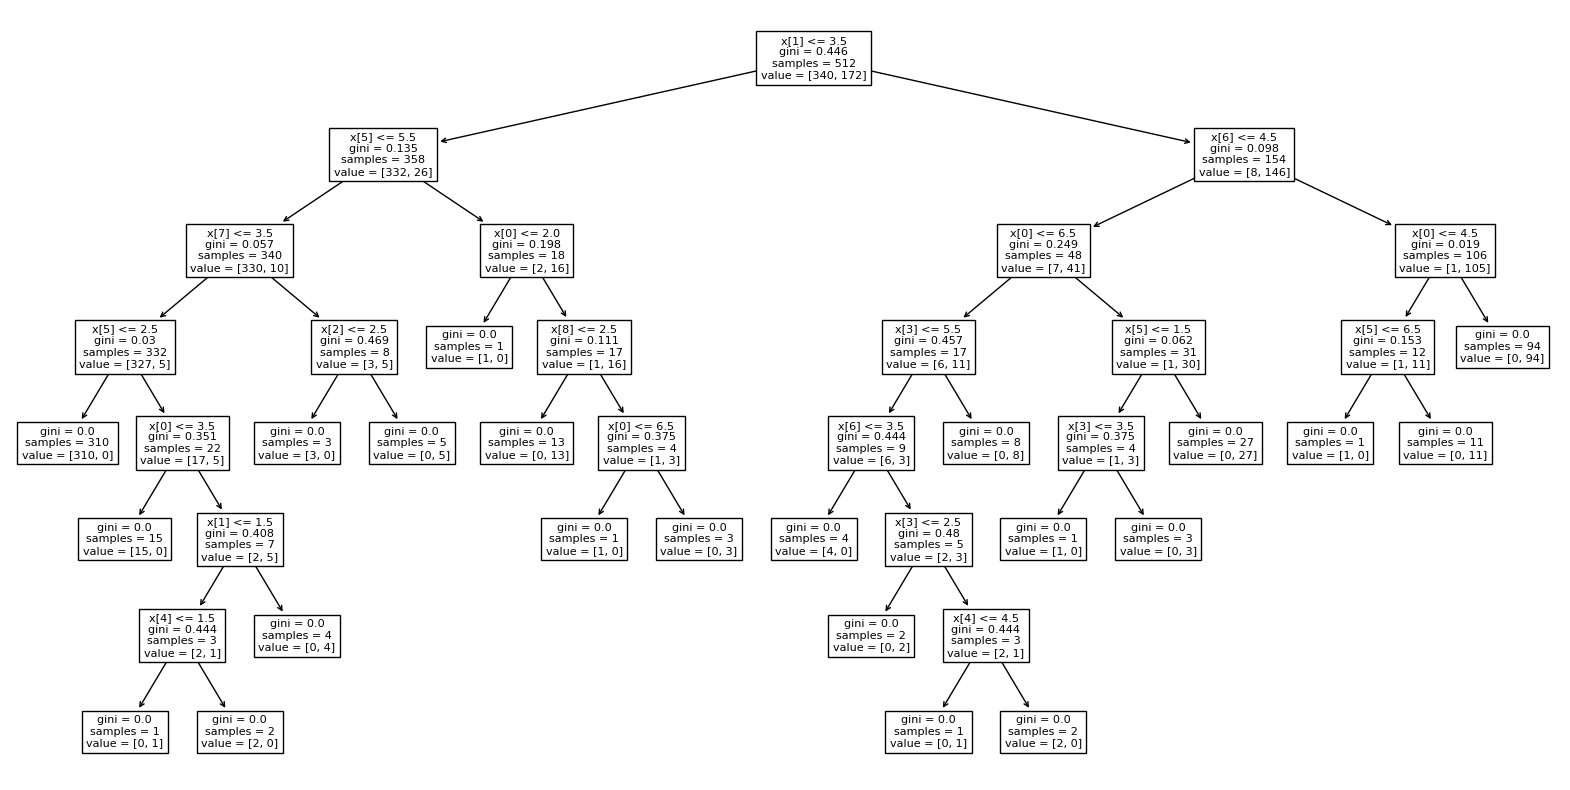

In [ ]:
plt.figure(figsize = (20,10))
tree.plot_tree(clf_max)
plt.show()

In [ ]:
(0.198*(18/512))/3

0.0023203125

In [ ]:
accuracy_score(y_test, clf_max.predict(X_test))

0.9473684210526315

In [ ]:
clf_prun = DecisionTreeClassifier(ccp_alpha=0.002)
clf_prun.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.002)

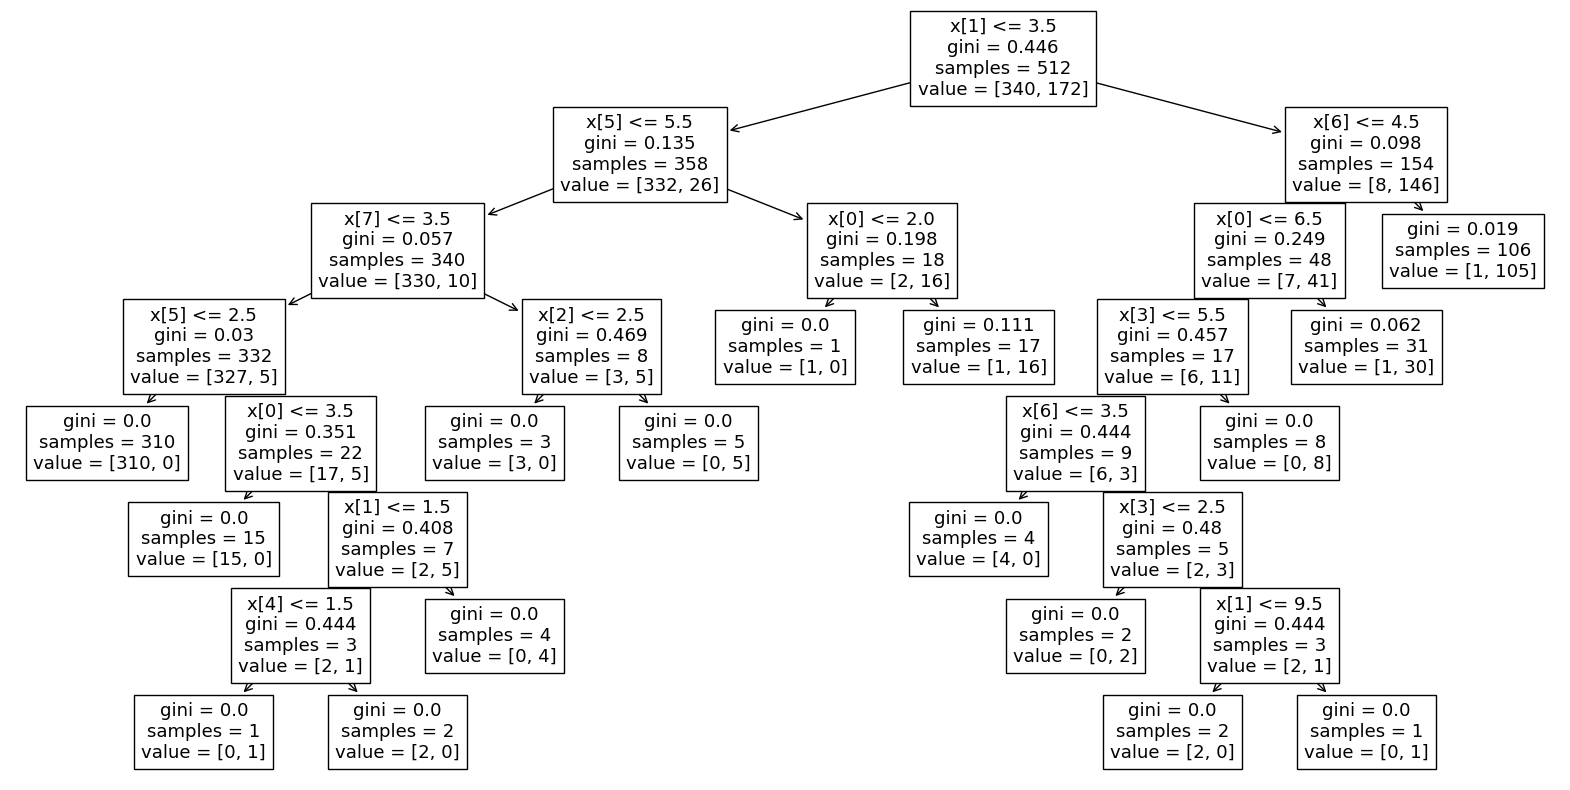

In [ ]:
plt.figure(figsize = (20,10))
tree.plot_tree(clf_prun)
plt.show()

In [ ]:
accuracy_score(y_test, clf_prun.predict(X_test))

0.9707602339181286

In [ ]:
clf = DecisionTreeClassifier()
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
ccp_alphas

array([0.        , 0.00183824, 0.00189012, 0.0019347 , 0.00234375,
       0.00260417, 0.00297619, 0.003125  , 0.00326797, 0.00472149,
       0.00682837, 0.00732422, 0.01135228, 0.04932841, 0.32235392])

[]

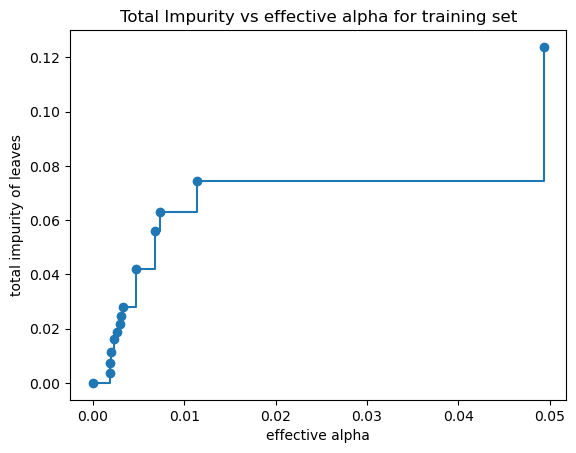

In [ ]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

plt.plot()

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha = ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

[]

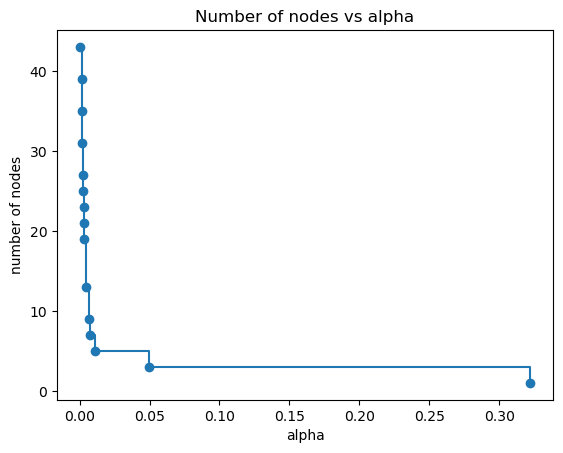

In [ ]:
node_counts = [clf.tree_.node_count for clf in clfs]

fig, ax = plt.subplots()
ax.plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax.set_xlabel("alpha")
ax.set_ylabel("number of nodes")
ax.set_title("Number of nodes vs alpha")
plt.plot()

[]

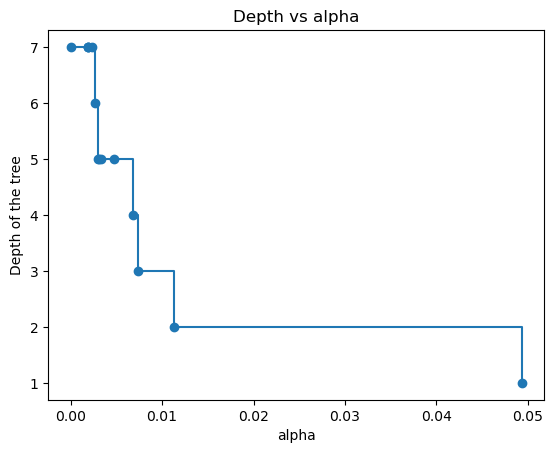

In [ ]:
depths = [clf.tree_.max_depth for clf in clfs[:-1]]

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], depths, marker="o", drawstyle="steps-post")
ax.set_xlabel("alpha")
ax.set_ylabel("Depth of the tree")
ax.set_title("Depth vs alpha")
plt.plot()


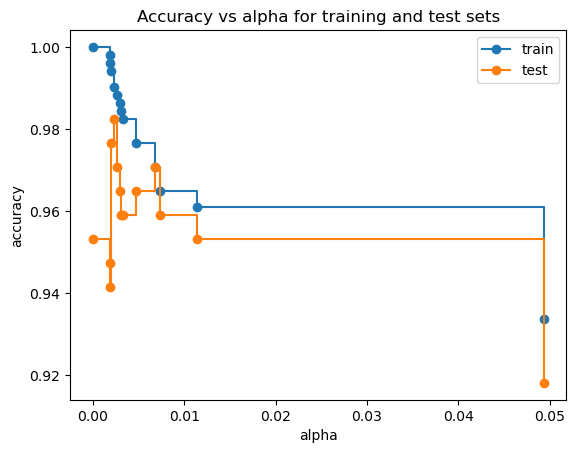

In [ ]:
train_scores = [accuracy_score(y_train,clf.predict(X_train)) for clf in clfs]
test_scores = [accuracy_score(y_test,clf.predict(X_test)) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and test sets")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()